# Assignment 3 Solution

### Speech Formants with Linear Predictive Coding, Vocoder (Mister Blue Sky)

Instructions: 

* This notebook is an interactive assignment; please read and follow the instructions in each cell. 

* Cells that require your input (in the form of code or written response) will have 'Question #' above.

* After completing the assignment, please submit this notebook and its pdf printout and all sound files. 

## Speech Formants and LPC

In this section, you will synthesize vowel sounds, and investigate the frequencies in vowels from your own voice. 

In [3]:
from scipy.io import wavfile
from scipy import signal as si
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipydisplay
import soundfile as sf
import scipy
from matplotlib import patches

mystery_1
R:[0.98969905 0.96978623 0.80210983]
theta:[0.25157285 1.69351479 2.21276729]
poles:[ 0.9585454 +0.24636342j -0.11871219+0.96249298j -0.48028346+0.64242352j]
[ 0.9585454 -0.24636342j -0.11871219-0.96249298j -0.48028346-0.64242352j]
mystery_2
R:[0.97650374 0.9594285  0.89166474]
theta:[0.38656316 0.66574766 2.03559251]
poles:[ 0.90444776+0.36814914j  0.75454755+0.59258843j -0.39968035+0.79707066j]
[ 0.90444776-0.36814914j  0.75454755-0.59258843j -0.39968035-0.79707066j]
mystery_3
R:[0.95136796 0.97351245 0.94048533]
theta:[0.53689328 0.93572828 1.99417502]
poles:[ 0.81751222+0.48659508j  0.57751903+0.78370802j -0.38639197+0.85744615j]
[ 0.81751222-0.48659508j  0.57751903-0.78370802j -0.38639197-0.85744615j]


/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


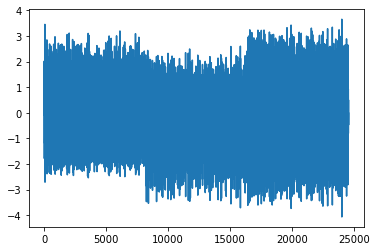

In [4]:
Fdict = {
    'mystery_1':[[328, 2208, 2885],[27,80,575]],
    'mystery_2':[[504, 868, 2654],[62,   108,  299]],
    'mystery_3':[[700, 1220, 2600],[130,   70,  160]]
    } # Formant frequencies in Hz

def excitation(f0,jitt,dur,nharm=None,unvoiced=False):
    w0T = 2*np.pi*f0/fs

    if nharm == None:
        nharm = int((fs/2)/f0) # number of harmonics
    nsamps = np.int(fs*dur)
    sig = np.zeros(nsamps)
    ph = np.random.uniform(size=nsamps)*2*np.pi
    n = np.arange(nsamps)

    if unvoiced:
        sig = np.random.normal(size=nsamps)
    else:
    # Synthesize bandlimited impulse train
        for i in range(1,nharm):
            sig = sig + np.cos(i*w0T*n + jitt*ph)
    
    sig = sig/max(sig)
    return sig

def voca(sig,F,Fb):
    R = np.exp(-np.pi*Fb/fs);     # Pole radii
    print(f'R:{R}')#debug
    theta = 2*np.pi*F/fs;     # Pole angles
    print(f'theta:{theta}')#debug
    poles = R * np.exp(1j*theta) # Poles[B,A] = zpk2tf(0,np.concatenate((poles, np.conj(poles))),1) # Filter from zeros and poles
    print(f'poles:{poles}')#debug
    print(np.conj(poles))#debug
    poles = np.array(poles)
    [B,A] = si.zpk2tf(0,np.concatenate((poles, np.conj(poles))),1) # Filter from zeros and poles

    speech = si.lfilter(B, A, sig)
    speech = speech/np.std(speech)
    return speech,B,A

fs = 8192 # 22050  % Sampling rate in Hz ("telephone quality" for speed)

vowels = list(Fdict.keys())
f0 = 150 # Pitch in Hz
dur = 1 #one second in duration
ji = 0.1 #0.1
ex = excitation(f0,ji,dur)

text = ['mystery_1','mystery_2','mystery_3']

speech = np.zeros(1)
for t in text:
    F = np.array(Fdict[t][0])
    Fb = np.array(Fdict[t][1])
    print(t)

    vow,B,A = voca(ex,F,Fb)
    speech = np.concatenate((speech,vow))

speech = speech/np.std(speech)
plt.plot(speech)

In [11]:
ipydisplay.Audio(speech, rate=fs) 

##### Question 1 (10 points)

Based on the audio output, what vowels were synthesized as mystery_1, mystery_2, and mystery_3? 
Please specify using a word; for example, if you heard an 'oo' sound as in 'hoot', you may answer with the word "hoot". 

mystery_1: 'ee' like eat 

mystery_2: 'o' like open

mystery_3: 'a' like calm

Now we will examine just one vowel in greater detail. 
Select one mystery vowel to analyze below: 

mystery_1
R:[0.98969905 0.96978623 0.80210983]
theta:[0.25157285 1.69351479 2.21276729]
poles:[ 0.9585454 +0.24636342j -0.11871219+0.96249298j -0.48028346+0.64242352j]
[ 0.9585454 -0.24636342j -0.11871219-0.96249298j -0.48028346-0.64242352j]


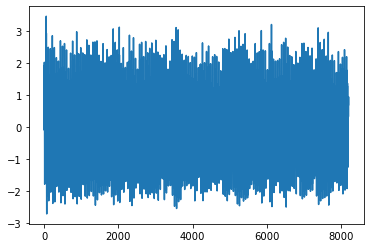

In [12]:
%matplotlib inline  

### Modify the line below:
text = ['mystery_1']

speech = np.zeros(1)
for t in text:
    F = np.array(Fdict[t][0])
    Fb = np.array(Fdict[t][1])
    print(t)

    vow,B,A = voca(ex,F,Fb)
    speech = np.concatenate((speech,vow))

speech = speech/np.std(speech)
plt.plot(speech)

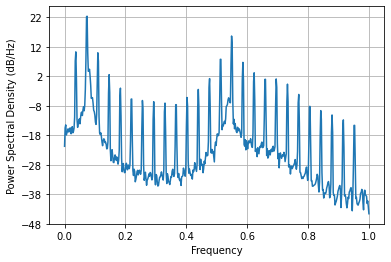

In [13]:
# Plot the power spectral density (PSD)
plt.psd(speech, 1024)
plt.show()

In [14]:
librosa.__version__

'0.9.1'

[ 1.         -0.71012347  0.55125691 -1.28635881  0.43864981 -0.27301065
  0.64097691 -0.1383676   0.11748967 -0.02292447  0.05887155]


/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Pass order=10 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


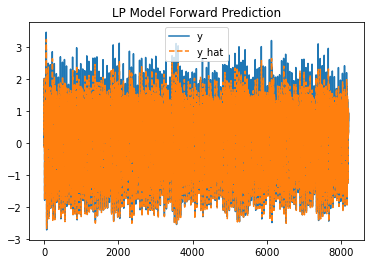

In [15]:
lpc_order = 10
s = speech

a = librosa.core.lpc(s, lpc_order)
print(a)
s_hat = scipy.signal.lfilter([0] + -1*a[1:], [1], s)
s_err = s[1:] - s_hat[:-1]
plt.plot(s[1:])
plt.plot(s_hat[:-1], linestyle='--')
plt.legend(['y', 'y_hat'])
plt.title('LP Model Forward Prediction')
plt.show()

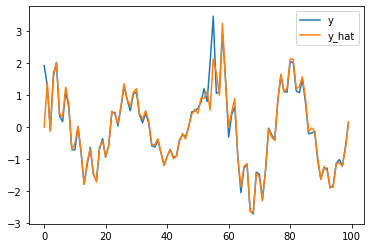

In [16]:
plt.plot(s[1:101])
plt.plot(s_hat[:100])
plt.legend(['y', 'y_hat'])
plt.show()

##### Question 2 (10 points)

What is being visualized as y and y_hat on the above plot?

```y is the original signal and y_hat is the prediction using lpc```

/anaconda2/envs/Python37/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


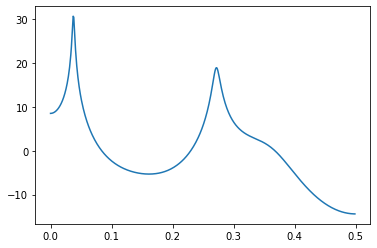

In [17]:
w,h = si.freqz(b=1,a = a, fs=1)
plt.plot(w,20*np.log10(h))

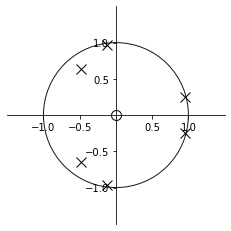

In [18]:
z,p,k = si.tf2zpk(B,A)
    
unit_circle = patches.Circle((0,0), radius=1, fill=False, color='black', ls='solid', alpha=0.9)
ax = plt.subplot(111)
ax.add_patch(unit_circle)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)    
    
plt.plot(z.real, z.imag, 'ko', fillstyle='none', ms = 10)
plt.plot(p.real, p.imag, 'kx', fillstyle='none', ms = 10)

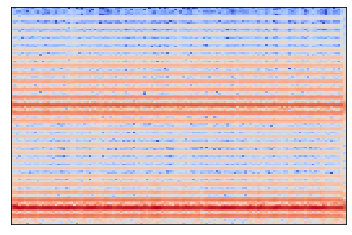

In [19]:
D = np.abs(librosa.stft(s,n_fft=256,hop_length = 64))
librosa.display.specshow(librosa.amplitude_to_db(D))

In [20]:
sample_rate, sample = wavfile.read("ee_mono.wav")
print(sample_rate)

48000


##### NOTE: 
To compare the PSD you need to use the same sampling frequency for both signals or interpret the frequency axis accordingly.

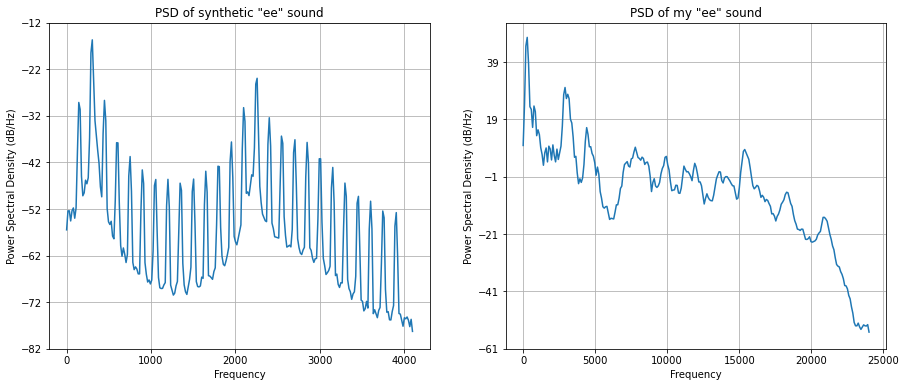

In [21]:
# Plot the power spectral density (PSD)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.psd(speech, 512, Fs = fs)
plt.title("PSD of synthetic \"ee\" sound")
plt.subplot(122)
plt.psd(sample, 512, Fs = sample_rate)
plt.title("PSD of my \"ee\" sound")
plt.show()

##### Question 4 (10 points)

How does the power spectral density of your recorded signal compare to the LPC spectrum? 

The power spectral density of my recorded signal is less regular due to natural deviations of the sound. Moreover, the fine details depend on the pitch of the synthetic versus real speaker. In the left graph the we see the individual peaks of the pitch, as well as the overall contour. Changing the NFFT parameter in psd command will alter the display. Using very low NFFT will smear the pitch effect. 
One can also see the small peaks on the right (natural speeh), but they are not evident for higher frequencies since they are more like band of noise then clear partials. 
In terms of the formant peaks, the LPC spectrum and the PSD of the synthetic signal show 2 peaks- one at a very low frequency and one in the middle that match the "ee" sound. 
An important aspect of the display, as noted earlier, is the frequency range. The synthetic signal was generated at much lower sampling rate, so it shows PSD up to 4000+ Hz, while the natural speech goes up to 24KHz. Comparing between the formant peaks should be done according to their absolute frequency locations, Formant 1 aroudn 300Hz, Formant 2 around 2200Hz.

Below we repeat the LPC plot with w (angular freqeuncy) scaled by sampling frequency fs.

/anaconda2/envs/Python37/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


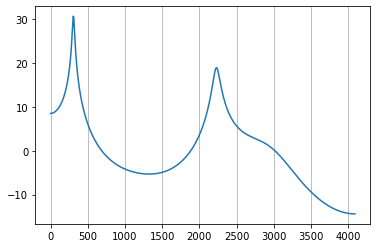

In [45]:
w,h = si.freqz(b=1,a = a, fs=1)
plt.plot(w*fs,20*np.log10(h))
plt.grid(axis = 'x')

# Simple Singing Vocoder

In this section we will use a spoken sound to process an excitation that plays a melody. In music such an effect is known as vocoding and it is used to produce a talking musical instrument. 

In [46]:
def lpc_to_formants(lpc, sr):    
    """Convert LPC to formants    
    """
        
    # extract roots, get angle and radius
    roots = np.roots(lpc)
    
    pos_roots = roots[np.imag(roots)>=0]
    if len(pos_roots)<len(roots)//2:
        pos_roots = list(pos_roots) + [0] * (len(roots)//2 - len(pos_roots))
    if len(pos_roots)>len(roots)//2:
        pos_roots = pos_roots[:len(roots)//2]
    
    w = np.angle(pos_roots)
    a = np.abs(pos_roots)
    
    order = np.argsort(w)
    w = w[order]
    a = a[order]
    
    freqs = w * (sr/(2*np.pi))
    bws =  -0.5 * (sr/(2*np.pi)) * np.log(a)    
    
    # exclude DC and sr/2 frequencies
    return freqs, bws

##### Questioon 5 [10 points] 

Record yourself speaking slowly the sentence "Mister Blue Sky". Plot a spectrogram of the speech sound.

In [47]:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


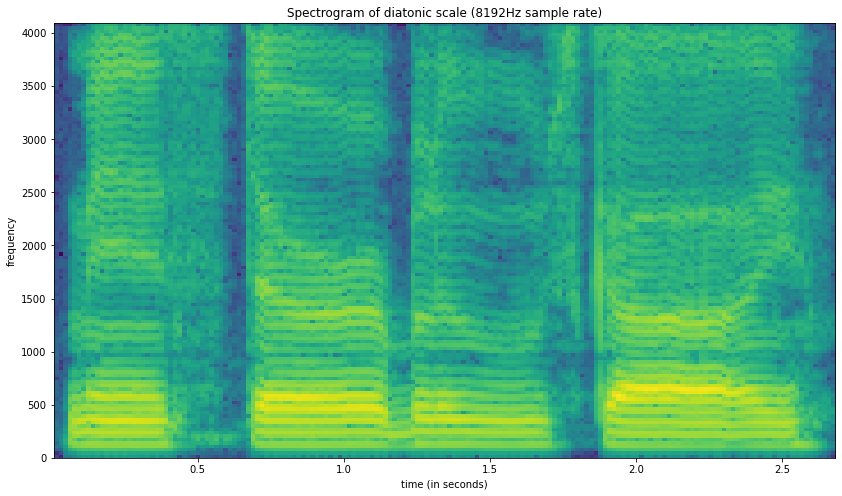

In [48]:
sample_rate = 90
sample_rate, blue_sky = wavfile.read("mister_blue_sky 2.wav")
#blue_sky = blue_sky[:,0]
time_array = np.arange(0, len(blue_sky)/sample_rate, 1/sample_rate)
setup_graph(title='Spectrogram of diatonic scale (%dHz sample rate)' % sample_rate, x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(blue_sky, Fs=sample_rate)

##### Question 6 [30 points]

In this question we will create a song based on the spoken sentence you recorded. You will choose the melody by creating a sequence of pitches that change slowly over time.
Write a function that does the following:

1. Divide the speech signal into short slices (frames) of 512 samples with 50% overlap
2. For each speech segment compute formants by converting lpc_to_formants (F,Fb)
3. Choose a pitch (f0) for each segment
4. Using the voca function, create a speech sound (vow) from an excitation (ex) with that pitch
4. Overlap and add the sound segments with cross-fade window to create one long sound file 

You are free to alter the durations of the segments and choice of notes for the melody. 
Note that the notes should be relatively long (f0 should not change very often).

Cross-fade between segments can be done by applying a traingular (numpy.bartlett) or raised cosine (numpy.hanning) window to each segment before.

In [49]:
def voca(sig,F,Fb):
    R = np.exp(-np.pi*Fb/fs);     # Pole radii
    theta = 2*np.pi*F/fs;     # Pole angles
    poles = [R * np.exp(1j*theta)] # Poles[B,A] = zpk2tf(0,np.concatenate((poles, np.conj(poles))),1) # Filter from zeros and poles
    poles = np.array(poles)
    [B,A] = si.zpk2tf(0,np.concatenate((poles, np.conj(poles))),1) # Filter from zeros and poles

    speech = si.lfilter(B, A, sig)
    speech = speech/np.std(speech)
    return speech,B,A

In [50]:
def voca(sig,F,Fb):
    R = np.exp(-np.pi*Fb/fs);     # Pole radii
    print(f'R:{R}')#debug
    theta = 2*np.pi*F/fs;     # Pole angles
    print(f'theta:{theta}')#debug
    poles = R * np.exp(1j*theta) # Poles[B,A] = zpk2tf(0,np.concatenate((poles, np.conj(poles))),1) # Filter from zeros and poles
    print(f'poles:{poles}')#debug
    print(np.conj(poles))#debug
    poles = np.array(poles)
    [B,A] = si.zpk2tf(0,np.concatenate((poles, np.conj(poles))),1) # Filter from zeros and poles

    speech = si.lfilter(B, A, sig)
    speech = speech/np.std(speech)
    return speech,B,A


In [52]:
# Read the speech file
sr, wave = wavfile.read("mister_blue_sky 2.wav")
fs=sr
print(sr)
wave = wave / np.std(wave)
# precompute the hamming window
frame_len = 256
window = scipy.signal.hann(frame_len)
vocode = np.zeros(len(wave+frame_len))

8192


/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


#### Creating a melody: 
We use the excitation functino with diferent f0 to create a melody. 

In [39]:
f0 = 200
ex = excitation(f0,ji,0.5)
f0 = 248
new_ex = excitation(f0,ji,0.5)
ex = np.concatenate((ex,new_ex))
f0 = 300
new_ex = excitation(f0,ji,0.5)
ex = np.concatenate((ex,new_ex))
f0 = 180
new_ex = excitation(f0,ji,0.5)
ex = np.concatenate((ex,new_ex))
f0 = 160
new_ex = excitation(f0,ji,0.5)
ex = np.concatenate((ex,new_ex))
f0 = 360
new_ex = excitation(f0,ji,0.5)
ex = np.concatenate((ex,new_ex))


/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


In [40]:
ipydisplay.Audio(ex, rate=fs) 

In [42]:
count = 0

# 50% window steps for overlap-add
for i in range(0,len(wave),frame_len//2):
    wave_slice = wave[i:i+frame_len]

    ### Your Code Here
    if wave_slice.sum() == 0 or len(wave_slice) < frame_len:
      continue
    F, Fb = lpc_to_formants(librosa.core.lpc(wave_slice, lpc_order), sr)

    print(np.array(formants).shape)#debug
    print(i)#debug

    #F =  formants[0][0]
    #Fb =  formants[1][0]
    
    #if F==0:
    #  continue
    count = count + 1
    print(f'F:{F}')#debug
    print(f'Fb:{Fb}')#debug
    print(f'ex.shape:{ex.shape}')#debug
    #ex = excitation(F,ji,1)
    #f0 = 200
    #ex = excitation(f0,ji,1)

    #vow,B,A = voca(ex[0:frame_len],F,Fb)
    vow,B,A = voca(ex[i:i+frame_len],F,Fb)
    vocode[i:i+frame_len] += vow * window

print(f'count:{count}')
wavfile.write("YOUR_OUTPUT_FILE.wav", sr, vocode[:len(wave)])

/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Pass order=10 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  if __name__ == '__main__':


(2, 5)
0
F:[ 201.05461 1065.1145  1907.0717  3014.194   4022.4968 ]
Fb:[ 37.92662  67.02143 148.57602 116.03181 269.8033 ]
ex.shape:(24576,)
R:[0.9855606  0.9746252  0.94461465 0.9564778  0.90170455]
theta:[0.15420696 0.8169326  1.4627057  2.311858   3.0852165 ]
poles:[ 0.9738656 +0.15137868j  0.6670926 +0.71055025j  0.10190525+0.93910176j
 -0.6456909 +0.7056437j  -0.900272  +0.05080769j]
[ 0.9738656 -0.15137868j  0.6670926 -0.71055025j  0.10190525-0.93910176j
 -0.6456909 -0.7056437j  -0.900272  -0.05080769j]
(2, 5)
128
F:[ 228.81839 1150.7539  2201.1804  3056.795   4095.9998 ]
Fb:[ 43.29353 135.33972 222.30444 191.72348 251.63673]
ex.shape:(24576,)
R:[0.98353416 0.9494217  0.91828024 0.92911285 0.9080085 ]
theta:[0.17550151 0.88261724 1.6882843  2.3445325  3.1415925 ]
poles:[ 0.96842617+1.7172700e-01j  0.6030079 +7.3333699e-01j
 -0.10763884+9.1194987e-01j -0.6492758 +6.6459888e-01j
 -0.9080085 +1.3710547e-07j]
[ 0.96842617-1.7172700e-01j  0.6030079 -7.3333699e-01j
 -0.10763884-9.11949

(2, 5)
8704
F:[ 480.69635 1303.7742  1648.6362  3263.8867  4095.9998 ]
Fb:[  4.9720664  49.985855   90.86665    58.85648   279.2159   ]
ex.shape:(24576,)
R:[0.9980951  0.9810133  0.96575326 0.97768164 0.8984557 ]
theta:[0.3686895 0.9999823 1.2644882 2.5033698 3.1415925]
poles:[ 0.93102354+3.5970679e-01j  0.5300583 +8.2548487e-01j
  0.29121387+9.2080063e-01j -0.78523064+5.8247244e-01j
 -0.8984557 +1.3566303e-07j]
[ 0.93102354-3.5970679e-01j  0.5300583 -8.2548487e-01j
  0.29121387-9.2080063e-01j -0.78523064-5.8247244e-01j
 -0.8984557 -1.3566303e-07j]
(2, 5)
8832
F:[   0.       473.49658 1338.2427  1580.3729  3289.2583 ]
Fb:[ 98.70664    6.240195  52.410152 135.57199   73.85611 ]
ex.shape:(24576,)
R:[0.962854   0.9976098  0.9801016  0.9493372  0.97207385]
theta:[0.         0.36316735 1.0264193  1.2121309  2.5228295 ]
poles:[ 0.962854  +0.j          0.9325421 +0.35438767j  0.50758016+0.838428j
  0.333241  +0.8889272j  -0.791848  +0.56383014j]
[ 0.962854  -0.j          0.9325421 -0.35438767

(2, 5)
18176
F:[ 311.0998   634.04865 1269.4365  2298.8743  3843.7844 ]
Fb:[138.61333    5.649307  16.145737  30.770521  37.799534]
ex.shape:(24576,)
R:[0.9482305  0.9978359  0.9938273  0.988269   0.98560864]
theta:[0.23861057 0.48630923 0.9736456  1.7632146  2.9481459 ]
poles:[ 0.92136455+0.22411692j  0.8821506 +0.46635476j  0.55881774+0.8218366j
 -0.18898973+0.9700301j  -0.96722454+0.1894759j ]
[ 0.92136455-0.22411692j  0.8821506 -0.46635476j  0.55881774-0.8218366j
 -0.18898973-0.9700301j  -0.96722454-0.1894759j ]
(2, 5)
18304
F:[ 329.66855  635.33673 1278.0142  2312.0735  3822.2659 ]
Fb:[122.474045    6.8397856  23.18329    42.942165   33.917866 ]
ex.shape:(24576,)
R:[0.9541178  0.9973805  0.99114865 0.9836667  0.9870769 ]
theta:[0.25285262 0.48729718 0.9802246  1.7733382  2.9316413 ]
poles:[ 0.9237794 +0.23868868j  0.88128704+0.46701285j  0.55190724+0.8232703j
 -0.1978743 +0.96355903j -0.9654017 +0.20571895j]
[ 0.9237794 -0.23868868j  0.88128704-0.46701285j  0.55190724-0.8232703j
 

##### Question 7 [10 points]

Why did we use overlapping windows for vocoder? 

We run lpc in a short-time manner (somewhat like STFT, but instead of using FT to find the frequencies, we use LPC to find the spectral envelope). Same as in STFT we use windowing to allow better time resolution while analyzing longer windows, we do the same here. Moreover, the windowing will smooth any phase inconsistencies due to change of the filters or excitation.